In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Mining/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Explore the Data (EDA)

In [ ]:
df.shape


(4600, 18)

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Check the Missing Values

In [ ]:
df.isnull().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


Jadi tidak ada nilai yang hilang dalam kumpulan data.

In [ ]:
df['city'].value_counts().nlargest(10)


,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


In [ ]:
le_city=LabelEncoder()
df['city']=le_city.fit_transform(df[['city']])
df['city'].value_counts().nlargest(5)

,count
city,
35,1573
32,293
3,286
31,235
19,187


Street Column

In [ ]:
df['street'].head()


,street
0,18810 Densmore Ave N
1,709 W Blaine St
2,26206-26214 143rd Ave SE
3,857 170th Pl NE
4,9105 170th Ave NE


In [ ]:
df['street'].value_counts().nlargest(10)


,count
street,
2520 Mulberry Walk NE,4
2500 Mulberry Walk NE,3
2803 SW Bataan St,2
8354 11th Ave NW,2
6008 8th Ave NE,2
14634 128th Ave NE,2
8430 8th Ave SW,2
11034 NE 26th Pl,2
5010 Greenwood Ave N,2


In [ ]:
df['street'].nunique()


4525

Ada 4525 Jalan yang berbeda. jadi itu adalah data yang tidak perlu.

In [ ]:
df.drop(columns='street',inplace=True)

date column

In [ ]:
df['date']=pd.to_datetime(df['date'])
df['date'].value_counts()

,count
date,
2014-06-23,142
2014-06-25,131
2014-06-26,131
2014-07-08,127
2014-07-09,121
...,...
2014-06-07,4
2014-07-06,3
2014-05-11,2


StateZip Column

In [ ]:
df['statezip'].head()

,statezip
0,WA 98133
1,WA 98119
2,WA 98042
3,WA 98008
4,WA 98052


In [ ]:
df['statezip'].value_counts().nlargest(10)

,count
statezip,
WA 98103,148
WA 98052,135
WA 98117,132
WA 98115,130
WA 98006,110
WA 98059,106
WA 98042,100
WA 98034,99
WA 98053,98


Kita dapat membuatnya menjadi Numerik jika menghapus ‘WA’.

In [ ]:
df['statezip'] = df['statezip'].str.replace('WA ', '').astype(int)

In [ ]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
date,4600,2014-06-07 03:14:42.782608640,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,4600.0,551962.988473,0.0,322875.0,460943.461539,654962.5,26590000.0,563834.702547
bedrooms,4600.0,3.40087,0.0,3.0,3.0,4.0,9.0,0.908848
bathrooms,4600.0,2.160815,0.0,1.75,2.25,2.5,8.0,0.783781
sqft_living,4600.0,2139.346957,370.0,1460.0,1980.0,2620.0,13540.0,963.206916
sqft_lot,4600.0,14852.516087,638.0,5000.75,7683.0,11001.25,1074218.0,35884.436145
floors,4600.0,1.512065,1.0,1.0,1.5,2.0,3.5,0.538288
waterfront,4600.0,0.007174,0.0,0.0,0.0,0.0,1.0,0.084404
view,4600.0,0.240652,0.0,0.0,0.0,0.0,4.0,0.778405
condition,4600.0,3.451739,1.0,3.0,3.0,4.0,5.0,0.67723


Kolom Negara


In [ ]:
df['country'].head()

,country
0,USA
1,USA
2,USA
3,USA
4,USA


In [ ]:
df.country.value_counts()


,count
country,
USA,4600


Semua data adalah bernegara Amerika Serikat. Jadi tidak perlu. Namun kita cek korelasinya terlebih dahulu.

In [ ]:
df['country']=LabelEncoder().fit_transform(df[['country']])

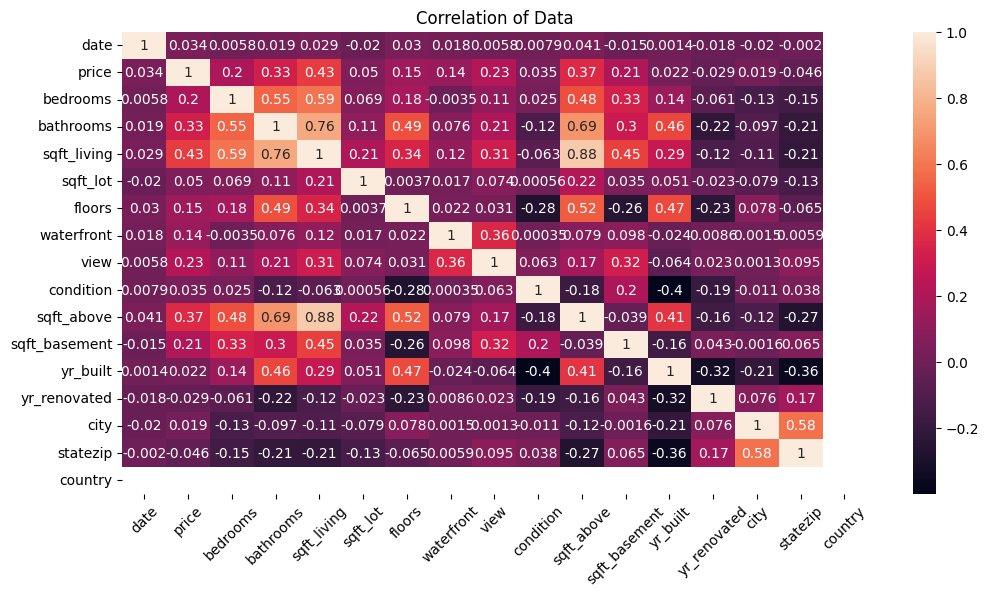

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation of Data")
plt.xticks(rotation=45)
plt.show()

Berdasarkan Correlation Heatmap, kolom (country, city, statezip, yr_renovated dan date) tidak memiliki korelasi yang kuat dengan harga.

Jadi saya akan menghapus kolom-kolom ini untuk mempersiapkan data untuk pembelajaran mesin.

In [ ]:
df=df.drop(columns=['date','city','statezip','country','yr_renovated'])

Menormalkan Kolom Harga

<Axes: ylabel='price'>

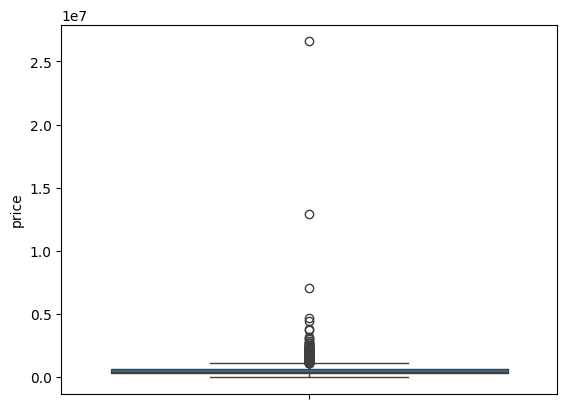

In [ ]:
sns.boxplot(df['price'])


<Axes: xlabel='price', ylabel='Count'>

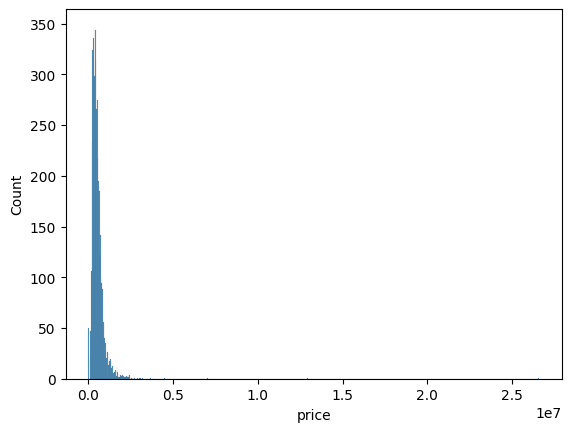

In [ ]:
sns.histplot(df['price'])

Terdapat outlier pada kolom ini, yang mendistorsi distribusi dan tidak merepresentasikan data secara akurat.

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Sekali lagi Periksa distribusi Data

<Axes: xlabel='price', ylabel='Count'>

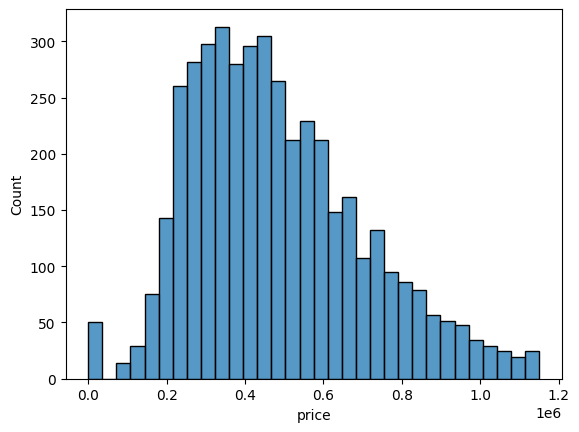

In [ ]:
sns.histplot(df['price'])

Plot sebar yang menunjukkan hubungan antara harga rumah dan luas area tempat tinggal. Plot ini membantu memvisualisasikan bagaimana ukuran rumah mempengaruhi harganya:

<Axes: xlabel='price', ylabel='sqft_living'>

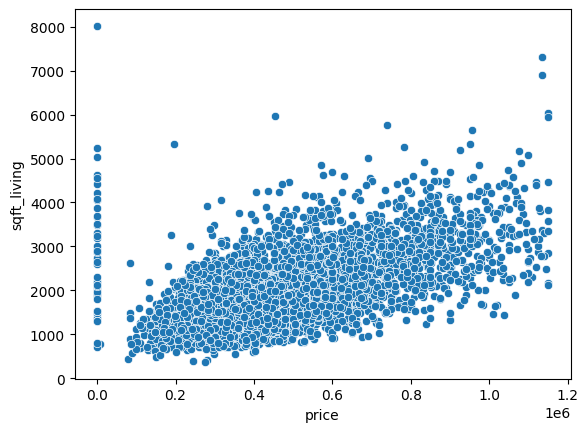

In [ ]:
sns.scatterplot(df,x='price',y='sqft_living')


In [ ]:
df[df['price']==0].head(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013


In [ ]:
df = df[df['price'] != 0]


<Axes: xlabel='sqft_living', ylabel='Count'>

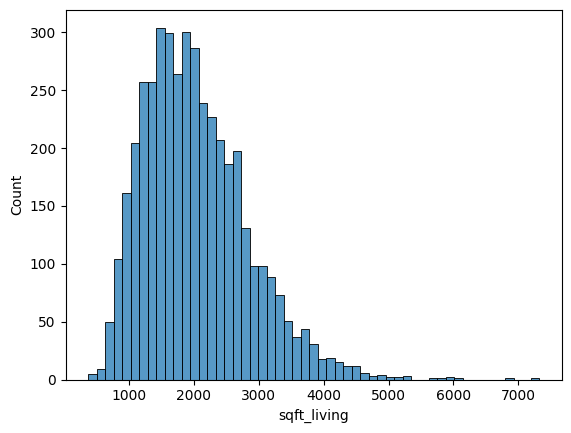

In [ ]:
sns.histplot(df['sqft_living'])


Plot Garis Tren Harga vs Sqft Living

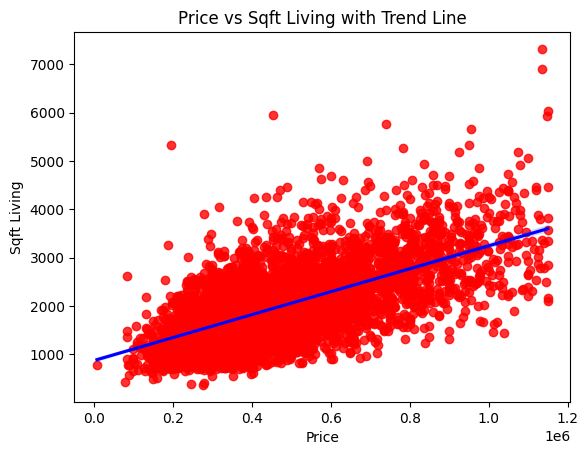

In [ ]:
sns.regplot(data=df, x='price', y='sqft_living', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Price vs Sqft Living with Trend Line')
plt.xlabel('Price')
plt.ylabel('Sqft Living')
plt.show()

In [ ]:
df.shape

(4311, 12)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938


Dataset ini sekarang telah diproses sebelumnya dan siap untuk digunakan dalam model Machine Learning.

Membagi Data

In [ ]:
X=df.drop(columns='price')
y=df['price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("LinearRegression")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=Ridge(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Ridge')
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=Lasso(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Lasso")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=ElasticNet()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("ElasticNet ")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("SVR")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("DecisionTreeRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("RandomForestRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("KNN")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Evaluation
print("GradientBoostingRegressor")
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("XGBRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

LinearRegression
MAE:  121785.4119510496
MSE: 23939066976.947998
R2 Score:  0.48209169551078257
---------
Ridge
MAE:  121784.19975787646
MSE: 23938718060.215282
R2 Score:  0.48209924412884786
---------
Lasso
MAE:  121785.36638825921
MSE: 23939053047.17752
R2 Score:  0.48209199687356397
---------
ElasticNet 
MAE:  124793.43823703699
MSE: 24820798264.570683
R2 Score:  0.46301593300811295
---------
SVR
MAE:  169256.86944643443
MSE: 47982402409.06643
R2 Score:  -0.03807239859968581
---------
DecisionTreeRegressor
MAE:  155333.05322663963
MSE: 42862484668.5461
R2 Score:  0.07269415377558186
---------
RandomForestRegressor
MAE:  120350.77196616822
MSE: 23900398200.566944
R2 Score:  0.4829282728273283
---------
KNN
MAE:  134519.70849232282
MSE: 30253780874.790565
R2 Score:  0.3454763975413421
---------
GradientBoostingRegressor
MAE:  116578.56967676691
MSE: 22301646079.165474
R2 Score:  0.5175163794269255
---------
XGBRegressor
MAE:  121960.18385536152
MSE: 25914742621.011806
R2 Score:  0.439

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Prediksi di training
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Prediksi di testing
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"{name}")
    print(f"Train R²: {train_r2:.3f} | Train MAE: {train_mae:.0f}")
    print(f"Test  R²: {test_r2:.3f} | Test  MAE: {test_mae:.0f}")
    print("Status:",
          "Overfitting" if train_r2 - test_r2 > 0.2 else
          "Underfitting" if train_r2 < 0.5 and test_r2 < 0.5 else
          "Good Fit")
    print("-----------")

# Contoh penggunaan
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge(alpha=0.1)),
    ("Lasso", Lasso(alpha=0.1)),
    ("ElasticNet", ElasticNet()),
    ("SVR", SVR()),
    ("DecisionTree", DecisionTreeRegressor()),
    ("RandomForest", RandomForestRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("GradientBoosting", GradientBoostingRegressor()),
    ("XGBoost", XGBRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_train, y_train, X_test, y_test)


LinearRegression
Train R²: 0.472 | Train MAE: 122602
Test  R²: 0.482 | Test  MAE: 121785
Status: Underfitting
-----------
Ridge
Train R²: 0.472 | Train MAE: 122602
Test  R²: 0.482 | Test  MAE: 121784
Status: Underfitting
-----------
Lasso
Train R²: 0.472 | Train MAE: 122602
Test  R²: 0.482 | Test  MAE: 121785
Status: Underfitting
-----------
ElasticNet
Train R²: 0.454 | Train MAE: 125825
Test  R²: 0.463 | Test  MAE: 124793
Status: Underfitting
-----------
SVR
Train R²: -0.028 | Train MAE: 172064
Test  R²: -0.038 | Test  MAE: 169257
Status: Underfitting
-----------
DecisionTree
Train R²: 1.000 | Train MAE: 20
Test  R²: 0.077 | Test  MAE: 155206
Status: Overfitting
-----------
RandomForest
Train R²: 0.928 | Train MAE: 44204
Test  R²: 0.488 | Test  MAE: 119442
Status: Overfitting
-----------
KNN
Train R²: 0.567 | Train MAE: 109168
Test  R²: 0.345 | Test  MAE: 134520
Status: Overfitting
-----------
GradientBoosting
Train R²: 0.601 | Train MAE: 107242
Test  R²: 0.518 | Test  MAE: 116492
Sta

Berdasarkan hasil dari 10 model di atas, GradientBoostingRegressor menunjukkan kinerja terbaik dan paling dapat diandalkan.

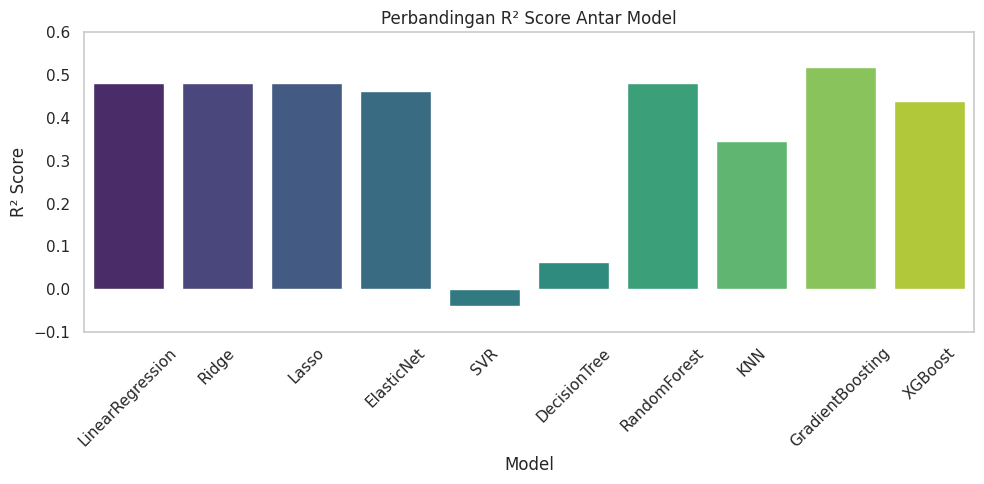

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kumpulan hasil evaluasi semua model
results = [
    {'Model': 'LinearRegression', 'R2': 0.4821},
    {'Model': 'Ridge', 'R2': 0.4821},
    {'Model': 'Lasso', 'R2': 0.4821},
    {'Model': 'ElasticNet', 'R2': 0.4630},
    {'Model': 'SVR', 'R2': -0.0380},
    {'Model': 'DecisionTree', 'R2': 0.0649},
    {'Model': 'RandomForest', 'R2': 0.4824},
    {'Model': 'KNN', 'R2': 0.3455},
    {'Model': 'GradientBoosting', 'R2': 0.5185},
    {'Model': 'XGBoost', 'R2': 0.4393},
]

# Konversi ke DataFrame
df = pd.DataFrame(results)

# Plot satu grafik bar untuk R2 Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2', data=df, palette='viridis')
plt.title('Perbandingan R² Score Antar Model')
plt.ylabel('R² Score')
plt.ylim(-0.1, 0.6)  # biar kelihatan perbedaannya
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Membuat Final Model

In [ ]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Prediction of Model
y_pred=model.predict(X_test)

Evaluasi Model

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)

MAE:  116600.9069592696
MSE: 22307033427.19104
R2 Score:  0.5173998271701353


Model ini memprediksi harga rumah dengan MAE sebesar $116.600, MSE sebesar 22,3 miliar, dan nilai R² sebesar 0,517, yang mengindikasikan bahwa model ini menjelaskan sekitar 51,7% dari varians harga. Performanya cukup baik, tetapi masih bisa ditingkatkan lagi.

Comparison of Actual vs. Predicted House Prices

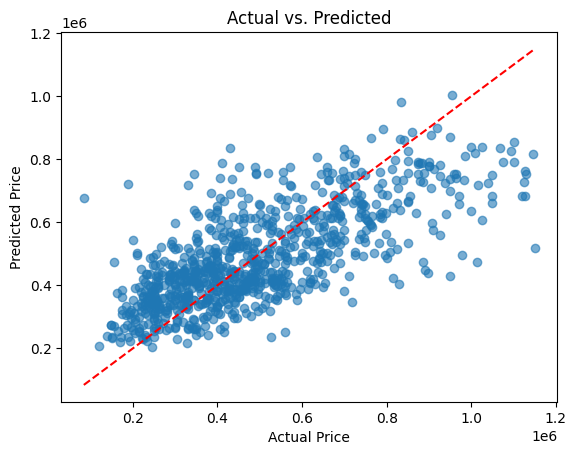

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
import pickle

with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)
